## Adaptation du tutoriel vers le texte

In [1]:
import numpy as np
from math import floor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

from keras.utils import np_utils

print('env: ', os.environ['CONDA_DEFAULT_ENV'])
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.
env:  deep-learning


## Lecture des csv

In [2]:
data = np.genfromtxt('../datas/RAW/alphabet-dataset/handwritten-data.csv', delimiter=',', max_rows=15000)

print(
    data.dtype, '\n',
    data.shape, '\n'
)

float64 
 (15000, 785) 



## Preprocessing

Soit 85% de données d'entrainement

Soit 15% de données de test

In [3]:
images = data[:,1:]
labels = data[:,0]

nbr_train = floor(85*data[:,1].size/100)

del(data)

# Explication:
# 0   127.5   255   3 valeurs par defaut
# 0   .25     1     /255
# -.5 0       .5    -.5
images = (images / 255) - 0.5

# Remodellage
images = np.apply_along_axis(lambda row: row.reshape(28,28), 1, images)
images = np.expand_dims(images, axis=3)
train_images, test_images = np.split(images, [nbr_train])

labels = to_categorical(labels)
train_labels, test_labels = np.split(labels, [nbr_train])

del(images, labels)

print(
    '\ntrain_images:\t', train_images.shape
    , '\ntest_images:\t', test_images.shape
    , '\ntrain_labels:\t', train_labels.shape
    , '\ntest_labels:\t', test_labels.shape
)


train_images:	 (12750, 28, 28, 1) 
test_images:	 (2250, 28, 28, 1) 
train_labels:	 (12750, 2) 
test_labels:	 (2250, 2)


## Je plot gentiment une lettre:

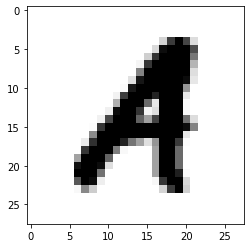

In [4]:
import matplotlib.pyplot as plt
from random import randrange

# train_images = np.apply_along_axis(
#   , 
#   1, 
#   train_images
#)
# train_images = np.expand_dims(train_images, axis=3)

image_test = test_images[randrange(0, len(test_images))]
plt.imshow(image_test, cmap='Greys')

## Construction du modèle

In [5]:
num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(2, activation='softmax'),
])

optimizer = 'adam'

model.compile(
  optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

## Entrainement du modèle

In [6]:
nb_epoch = 3

print(
  'num_filters:\t', num_filters,
  '\nfilter_size:\t', filter_size,
  '\npool_size:\t', pool_size,
  '\noptimizer:\t', optimizer,
  '\nnb_epoch:\t', nb_epoch,
)

model.fit(
  train_images,
  train_labels,
  epochs=nb_epoch,
  validation_data=(test_images, test_labels),
)

print(
  model.evaluate(test_images, test_labels)
)

# Save the model to disk.
model.save_weights('CNN.h5')

[5.400258088547775, 0.4977778]


In [7]:
def transform_to_letter(index: int):
    alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    return alphabet[index]

# model.load_weights('tutoriels_CNN/tuto1_cnn.h5')

nb_element = 29

prediction = [transform_to_letter(lettre) for lettre in np.argmax( model.predict(test_images[:nb_element]) , axis=1)]
verite = [ transform_to_letter(np.where(lettre == 1)[0][0])  for lettre in test_labels[:nb_element] ] 

print(
    'Prediciton:\t', prediction,
    '\nVérité:\t\t', verite,
    '\nLe modèle donne un resultat juste ? ', prediction == verite
)

Prediciton:	 ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'] 
Vérité:		 ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'] 
Le modèle donne un resultat juste ?  True


# Les hyperparamètres à tester:

## Network Depth
What happens if we add or remove Convolutional layers? How does that affect training and/or the model’s final performance?
```
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),

  Conv2D(num_filters, filter_size),
  
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])
```

## Dropout
What if we tried adding Dropout layers, which are commonly used to prevent overfitting (surentrainement) ?
```
from tensorflow.keras.layers import Dropout

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  
  Dropout(0.5),

  Flatten(),
  Dense(10, activation='softmax'),
])
```

## Fully-connected Layers
What if we add fully-connected layers between the Convolutional outputs and the final Softmax layer? This is something commonly done in CNNs used for Computer Vision.

```
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),

  Dense(64, activation='relu'),
  
  Dense(10, activation='softmax'),
])
```

## Convolution Parameters

What if we play with the Conv2D parameters? For example:

```
Conv2D(
    num_filters,
    filter_size,
    input_shape=(28, 28, 1),

    strides=2,
    padding='same',
    activation='relu',
    
  ),
```

code complet du tutoriel :

``` python
# The full CNN code!
####################
import numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

# Save the model to disk.
model.save_weights('cnn.h5')

# Load the model from disk later using:
# model.load_weights('cnn.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]
```